<a href="https://colab.research.google.com/github/AdamStamm/bootcamp_alura/blob/main/Notebooks/Bootcamp_Data_Science_Modulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Apresentação

Esse notebook contempla os códigos aprendidos no **Módulo 3** do Bootcamp Data Science aplicada desenvolvido pela [Alura](http://alura.com.br). O foco de aprendizado é **Análise descritiva e testes estatíticos**.

#Importando bibliotecas.

In [1]:
import pandas as pd
from zipfile import ZipFile
 
#biblioteca de fluxo de entrada e saída
#importamos o pacote de leitura binária
from io import BytesIO
import requests

- A biblioteca IO foi feita para controle de fluxos de entrada/saída de dados, no módulo anterior usamos o pacote StringIO da io para capturar o fluxo de dados que estavam na memória (copy and paste). Agora usaremos para capturar o fluxo de dados binários.
Mais informações: https://docs.python.org/3/library/io.html
 
- A biblioteca requests permite que você faça requisições HTTP de maneira fácil sem a necessidade de uma API.
mais informações [aqui](https://requests.readthedocs.io/pt_BR/latest/user/quickstart.html) ou [aqui](https://www.digitalocean.com/community/tutorials/how-to-get-started-with-the-requests-library-in-python-pt)

#Aula 1 - Educação, saúde e tipos de dados.

##Carregando dados

Dessa vez carregaremos os dados de um arquivo zipado, sem descompacta-lo no computador, por maior comodidade upei o arquivo zip direto no meu [Github](https://github.com/AdamStamm/bootcamp_alura/).

In [2]:
#Fazendo requisição binária do arquivo zip do github
path = 'https://github.com/AdamStamm/bootcamp_alura/blob/main/dados/PeNSE_2015_AMOSTRA2.zip?raw=true'
r = requests.get(path)
zip_file = BytesIO(r.content)
 
# Leitura do arquivo zip
zip = ZipFile(zip_file) 
 
#pega o caminho da lista de arquivos
caminho_arquivo_zip = zip.namelist()[1]
 
dados = pd.read_csv(zip.open(caminho_arquivo_zip), sep=';')

In [3]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,"37,1",157,2,1,1223,1,"299,735235",1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,"50,2",152,2,2,1223,1,"355,170081",1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,"48,2","161,4",2,2,1223,1,"299,735235",1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,"69,4","172,5",2,3,1223,1,"355,170081",1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,"78,9","167,5",2,4,1223,1,"299,735235",1,2,4,1,5,1,296


Algumas propriedades do ZipFile

In [4]:
#mostrando o objeto que o ZipFile possui.  
zip

<zipfile.ZipFile file=<_io.BytesIO object at 0x7f0f80334d00> mode='r'>

In [5]:
#vendo a lista de arquivos contidos no .zip
zip.infolist()

[<ZipInfo filename='arquivos csv/' external_attr=0x10>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV' compress_type=deflate external_attr=0x20 file_size=7262170 compress_size=1235667>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=11420533 compress_size=1329882>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=5000642 compress_size=114324>,
 <ZipInfo filename='arquivos sas/' external_attr=0x10>,
 <ZipInfo filename='arquivos sas/pense_amostra2_aluno.sas7bdat' compress_type=deflate external_attr=0x20 file_size=24691712 compress_size=1957530>,
 <ZipInfo filename='arquivos sas/pense_amostra2_alunoescola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=45253632 compress_size=2461932>,
 <ZipInfo filename='arquivos sas/pense_amostra2_escola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=18105344 compress_size=332162>,
 <Zip

In [6]:
#outra forma de ver os arquivos, retornando uma lista
zip.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

Propriedade do requests

In [7]:
#verificando a URL que a requests capturou
r.url

'https://raw.githubusercontent.com/AdamStamm/bootcamp_alura/main/dados/PeNSE_2015_AMOSTRA2.zip'

Iniciando análises iniciais

In [8]:
#verificando o tamanho do data frame
print(f'O conjunto tem {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O conjunto tem 16556 linhas e 181 colunas


In [9]:
#visualizando colunas
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

Percebemos que existem colunas com os nomes das variáveis difíceis de serem identificados, por essa razão é necessário estudarmos o dicionário de variáveis que acompanha o arquivo zip. Uma outra forma de abordagem é observar a forma desses dados como faremos a seguir.

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(7), int64(171), object(3)
memory usage: 22.9+ MB


Percebemos que existem 7 colunas do tipo float, 171 do tipo inteiro e 3 objects.

In [11]:
#visualizando dados por tipo
dados.select_dtypes(include='object')

,VB17003,VB17004,PESO
0,"37,1",157,"299,735235"
1,"50,2",152,"355,170081"
2,"48,2","161,4","299,735235"
3,"69,4","172,5","355,170081"
4,"78,9","167,5","299,735235"
...,...,...,...
16551,"56,7","167,9","447,815539"
16552,"61,9","185,8","592,50744"
16553,"60,9","159,4","401,131512"
16554,"47,3","157,8","442,718091"


Note que o tipo object em geral trata de strings, mas temos 3 colunas de tipo float sendo tratadas como strings, isso acontece por que no nosso idioma pontos flutuantes são debitados por vírgula, no formato americano são demorados por ponto, isso faz com que o código seja classificado como string na hora do carregamento dos dados. Para corrigir isso basta, na hora do carregamento dos dados, informar essa característica incluindo os parâmetros thousands para milhar e decimal para decimais.
 
Também é importante olhar o dicionário de dados, se verificarmos a coluna PESO refere-se ao peso *estatístico* dos dados e **não** do peso dos alunos.

- **VB17003:** Peso(Kg) do aluno
- **VB17004:** Altura do aluno
- **PESO:** Peso amostral para expansão.

In [12]:
#carregando conjunto de dados com os parâmetros adicionais (deixei uma nova
#célula apenas por questão didática)
dados = pd.read_csv(zip.open(caminho_arquivo_zip), sep=';',thousands='.', decimal=',')

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


Note que já não temos mais as colunas do tipo objeto, vamos observar então as colunas do tipo float.

In [14]:
dados.select_dtypes(include='float64')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


*Dicionário:

- **VB17001**: Qual o peso do aluno?
- **VB17002**: Qual a altura do aluno?

OBS: Anteriormente tinhamos visto que peso e aluna do aluno eram a coluna VB17003 e VB17004, por que isso? As de final 01 e 02 são dados aferidos dos alunos e as 03 e 04 são dados imputados pelo sistema.

#Tipos de variáveis.

##Exemplos de tipos distintos

**Qualitativas**: São características que não possuem valores quantitativos, mas, ao contrário são definidas por diversas categorias, ou seja, representam uma classificação dos indivíduos. Podem ser de dois tipos.

- **Nominais**: São dados que não podem ser ordenados entre as categorias. Ex: cor dos olhos, doente/sadio, etc...

- **Ordinais**: São dados que possuem uma ordenação entre as categorias. Ex: estágio da doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro...).

**Quantitativas**: São as características que podem ser medidas em uma escala quantitativa, ou seja, apresentam valores numéricos que fazem sentido. Também podem ser de dois tipos.

- **Contínuas**:  Características mensuráveis que assumem valores em uma escala contínua (na reta real do plano cartesiano), para quais valores fracionais fazem sentido. Ex: Peso (balança), altura (régua), tempo (relógio), pressão arterial, idade, etc...

- **Discretas**: São características mensuráveis que podem assumir apenas um número finito ou infinito contável de valores e, assim, somente fazem sentido valores inteiros. Geralmente são o resultado de contagens. Ex: Número de filhos, número de bactérias por litro de leite, número de cigarros fumados por dia.

##Desafio 1: Descompactar a pasta zipada utilizando outro método.

Para esse desafio irei fazer upload da pasta para o Google drive uma vez que o GitHub não permite a manipulação de dados sem que sejam dados commits. Portanto irei montar o drive e então trabalhar com o zip.
 
Após o drive montado irei utilizar comandos de Shell Script, ou seja, comandos bashrc. Os servidores colab utilizam por baixo dos panos o sistema Unix e isso permite esse tipo de utilização. Para enviarmos comandos para o sistema usamos o sinal de exclamação antes do comando.

In [15]:
#deixarei a celula comentada pois ainda irei trabalhar muito com esse notebook
#!unzip /content/drive/MyDrive/Dados_Bootcamp/PeNSE_2015_AMOSTRA2.zip -d /content/drive/MyDrive/Dados_Bootcamp

In [16]:
#visualizando arquivos extraídos
!ls /content/drive/MyDrive/Dados_Bootcamp

'arquivos csv'	  Dicionario_PENSE_Microdados_AMOSTRA2.xls
'arquivos sas'	  PeNSE_2015_AMOSTRA2.zip
'arquivos xlsx'


##Desafio 2: Estudar a base PeNSE.

In [17]:
#incluindo vídeo no notebook
from IPython.core.display import HTML
HTML('<center><iframe width="853" height="480" src="https://www.youtube.com/embed/z4BBCHZUvD4" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>')

Os dados que serão trabalhados são da Pesquisa Nacional de Saúde do Escolar de 2015. Essa foi a terceira edição da PeNSE e foi a primeira que inclui alunos do ensino médio na faixa dos 13 aos 17 anos, as edições anteriores contemplavam apenas alunos até o nono ano (antiga oitava série).
 
Os estudantes são selecionados de um conjunto de escolas previamente definido (Amostra), e para cada um desses grupos escolares foi criado um plano tabular.
 
A Pesquisa é realizada 
graças à parceria do Ministério da Saúde com o Instituto Brasileiro de Geografia e Estatística e o apoio do Ministério da 
Educação. Ela faz parte da Vigilância dos Fatores de Risco e Proteção das Doenças Crônicas do Brasil. Em 2015, com a inclusão da amostra de estudantes de 13 a 17 anos, tornou a PeNSE 
comparável aos inquéritos internacionais.

##Desafio 3: Classificar algumas das perguntas do conjunto de dados como qualitativas e quantitativas.

**Quantitativas**
- Discretas:
 
>>- VB01010A (Contando com você, quantas pessoas moram na sua casa ou apartamento?)
- VB01019 (Quantos banheiros com chuveiro têm dentro da sua casa?)
- VB02001 (Nos últimos 7 dias, em quantos dias você comeu feijão?)
- VB02002 (Nos últimos 7 dias, em quantos dias você comeu salgados fritos?)
- VB02004A (Nos últimos 7 dias, em quantos dias você comeu pelo menos um tipo de vegetal?)
- VB03001A2 (Nos últimos 7 dias, em quantos você voltou a pé ou de bicicleta da escola?)

- Contínuas:

>>- VB17001: Qual o peso do aluno?
- VB17002: Qual a altura do aluno?
- TEMPODESLOC: Tempo de deslocamento diário acumulado pelo escolar, com deslocamento da casa para a escola e da escola para casa feito a pé ou de bicicleta.
- TEMPOEDFIS: Tempo médio acumulado em que o escolar fez atividades físicas.
- TEMPOEXTRA: Tempo médio diário acumulado do escolar com a prática de uma atividade física extraescolar como esportes, dança, ginástica, musculação...


**Qualitativas**
- Nominais:

>>- VB01023 (Você estuda em regime integral?)
- VB01024 (Você estuda em regime de internato?)
- VB01026 (Quando terminar o ciclo/curso que você está frequentando atualmente, você pretende?)
- VB01006 (Você mora com sua mãe?)
- VB01007 (Você mora com seu pai?)
- VB01013 (Na sua casa tem telefone fixo?)
- VB01014 (Você tem celular?)
- VB01015A (Na sua casa tem computador?)
- VB01016 (Você tem aceso à internet em sua casa?)
- VB01018 (Alguém que mora na sua casa tem carro?)

- Ordinais:

>>- VB01004 (Mês de aniversário?)
- VB01005 (Em que ano nasceu?)
- VB01021 (Em que série/ano você está?)
- VB01022 (Em que turno você estuda?)
- VB01025 (Qual o grau de escolaridade mais elevado que pretendo concluir?)
- VB01008A (Que nível de ensino (grau) sua mãe estudou ou estuda?
- VB03002A1 (Quando você vai para a escola a pé ou de bicicleta, quanto tempo você gasta?
- VB06006 (Quantos amigos seus usam drogas?)

#Aula 2 - Dados qualitativos e tabela de frequência.

Agora vamos iniciar uma análise da frequência das repostas do questionário.

In [18]:
#Verificando a frequência de respostas por sexo do aluno.
dados['VB01001'].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [19]:
#verificando a porcentagem
dados['VB01001'].value_counts(normalize=True)*100

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

A relação a alunos do sexo masculino e feminino que responderam ao questionário é bem equilibrada. Isso acontece por que essa pergunta faz parte da estratégia de amostragem da pesquisa. No entanto, existem outras perguntas que são independentes dessa estratégia. Como por exemplo a relação de satisfação do aluno com relação a seu corpo (variável VB11007) conforme analisaremos abaixo.

In [20]:
frequencia = dados['VB11007'].value_counts()
frequencia

2     6920
1     4608
4     2326
3     1807
5      714
99     181
Name: VB11007, dtype: int64

A resposta 2 é a meais respondida, seguido da 1 e da 4... Mas note que é difícil da gente visualizar isso, portanto vamos ao dicionário.

In [21]:
percentual = dados['VB11007'].value_counts(normalize=True)*100
percentual

2     41.797536
1     27.832810
4     14.049287
3     10.914472
5      4.312636
99     1.093259
Name: VB11007, dtype: float64

In [22]:
#Criando a lista de respostas conforme dicionário
respostas = {1: 'Muito Satisfeito',
             2: 'Satisfeito',
             3: 'Indiferente',
             4: 'Insatisfeito',
             5: 'Muito insatisfeito',
             99: 'Não informado'}
#Criando um data frame para melhor análise dos resultados acima.
dist_freq = pd.DataFrame({'Frêquencia': frequencia, 'Percentual': percentual})
dist_freq.rename(index=respostas,inplace=True)
dist_freq.rename_axis('Sentimento em relação ao seu corpo', axis=1, inplace=True)
#arredondando os valores percentuais
dist_freq['Percentual'] = dist_freq['Percentual'].round(2)
dist_freq

Sentimento em relação ao seu corpo,Frêquencia,Percentual
Satisfeito,6920,41.80
Muito Satisfeito,4608,27.83
Insatisfeito,2326,14.05
Indiferente,1807,10.91
Muito insatisfeito,714,4.31
Não informado,181,1.09


Percebemos que a maioria dos alunos se sentem satisfeitos em relação ao próprio corpo.

##Desafio 4: Criar uma função para gerar as tabelas de freqûencia e, além disso, fazer a análise de outras informações.

In [23]:
def tabela_frequencia(dados, dicionario=None, titulo_frequencias=None):
    '''
    Retorna uma tabela de frequência baseada na coluna e no dataframe recebido.
 
    Parametros:
        dados (series): Series contendo os dados selecionados
        dicionario (dict): Dicionário das respostas/index
        titulo_frequencias (str): Título para a coluna index.
    Retornos:
        dados (DataFrame): Tabela de frequencias das respostas
    '''
 
    frequencia = dados.value_counts()
    percentual = dados.value_counts(normalize=True) * 100
    percentual = percentual.round(2)
    dados = pd.DataFrame({"Frequencia": frequencia, "Percentual": percentual})
    if dicionario:
      dados.rename(index=dicionario, inplace=True)
    if titulo_frequencias:
      dados.rename_axis(titulo_frequencias,axis=1,inplace=True)
 
    return dados

In [24]:
img_corp = {1: 'Muito Importante',
            2: 'Importante',
            3: 'Indiferente',
            4: 'Insatisfeito(a)',
            5: 'Muito insatisfeito(a)',
            99: 'Não informado'}
test_function = tabela_frequencia(dados['VB11007'],img_corp, 'Grau')

In [25]:
test_function

Grau,Frequencia,Percentual
Importante,6920,41.80
Muito Importante,4608,27.83
Insatisfeito(a),2326,14.05
Indiferente,1807,10.91
Muito insatisfeito(a),714,4.31
Não informado,181,1.09


#Aula 3 - Frequência em dados contínuos e Pandas CrossTab

Agora vamos criar esse tipo de tabela de frequência mas com dados contínuos. Trabalharemos com o VB17004 a altura dos estudantes.

In [26]:
dados['VB17004']

0        157.0
1        152.0
2        161.4
3        172.5
4        167.5
         ...  
16551    167.9
16552    185.8
16553    159.4
16554    157.8
16555    163.9
Name: VB17004, Length: 16556, dtype: float64

Veja que não temos classes pré-definidas nesse caso, como construir, portanto, uma tabela de frequência para esse tipo de informação?
Uma das formas é criarmos variáveis conforme segue.

In [27]:
#Criando a variável IMC (VB17003: peso, VB17004: altura), 
#o IMC é o resultado da divisão do peso pela a altura ao quadrado
#como a altura está em centimetros e o IMC faz a conta por metros iremos dividir
#por 100 a altura.
dados['IMC'] = dados['VB17003'] / ((dados['VB17004']/100)**2)
dados['IMC']

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

Criando as classes

In [28]:
classes = [0, 18.5, 25, 30, 35, 60]
labels = ['abaixo', 'adequado', 'sobrepeso', 'obesidade grau I', 'obesidade grau II']
 
dados['CLASSE_IMC'] = pd.cut(x = dados['IMC'],
       bins = classes,
       #labels = labels,
       include_lowest = True)
 
dados[['IMC','CLASSE_IMC']]

,IMC,CLASSE_IMC
0,15.051321,"(-0.001, 18.5]"
1,21.727839,"(18.5, 25.0]"
2,18.502907,"(18.5, 25.0]"
3,23.322831,"(18.5, 25.0]"
4,28.122076,"(25.0, 30.0]"
...,...,...
16551,20.113223,"(18.5, 25.0]"
16552,17.930782,"(-0.001, 18.5]"
16553,23.968489,"(18.5, 25.0]"
16554,18.995343,"(18.5, 25.0]"


Entendendo o intervalo sem incluir a opção labels (comentada no código). Note que o intervalo é do mais baixo (lowest) como aberto `(` e o superior como intervalo fechado `]`

Com a inclusão das labels segue abaixo.

In [29]:
classes = [0, 18.5, 25, 30, 35, 60]
labels = ['abaixo', 'normal', 'sobrepeso', 'obesidade grau I', 'obesidade grau II']
 
dados['CLASSE_IMC'] = pd.cut(x = dados['IMC'],
       bins = classes,
       labels = labels,
       include_lowest = True)
 
dados[['IMC','CLASSE_IMC']]

,IMC,CLASSE_IMC
0,15.051321,abaixo
1,21.727839,normal
2,18.502907,normal
3,23.322831,normal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,normal
16552,17.930782,abaixo
16553,23.968489,normal
16554,18.995343,normal


Colocamos nomes aos intervalos.

In [30]:
#gera tabela de frequencia
dist_freq = tabela_frequencia(dados['CLASSE_IMC'])
dist_freq

,Frequencia,Percentual
normal,9188,55.50
abaixo,4975,30.05
sobrepeso,1760,10.63
obesidade grau I,488,2.95
obesidade grau II,145,0.88


Note que 30% dos estudantes estão com o peso abaixo do normal, interesse fato a ser investigado.

##Regra de Sturges

Até agora vimos como definir classificações para frequências, no caso do IMC podemos verificar essas classificações por dados na literatura e outras fontes. Mas e quando não temos esses dados? Quantas classes devemos colocar? Ou seja, qual o número adequado de classes para um conjunto de dados? É o que veremos agora.

In [31]:
#verificando a altura mínima
dados['VB17004'].min()

124.1

In [32]:
#verificando a altura máxima
dados['VB17004'].max()

195.3

Quantas classes temos que ter entre 124.1 e 195.3? Qual esse número? Qual esse K de classes?
Isso depende do número de amostras do nosso dataset, então, segundo um estatístico chamado Sturges, o número de classes deve ser proporcional ao tamanho da amostra. O K por sua vez é:

### $$K = 1 + \frac{10}{3} \cdot  \log_{10}(N)$$

Onde N = Tamanho da amostra

In [33]:
#importamos a biblioteca numpy que trata de ferramentas matemáticas.
import numpy as np

tamanho_amostra = len(dados)

#incluimos o int para desprezar numeros decimais uma vez que queremos classes
k = int(1 + ((10/3)*np.log10(tamanho_amostra)))
k

15

K = 15, isso significa que devemos incluir 15 classes para esses dados.

In [34]:
dados['CLASSE_ALTURA'] = pd.cut(x = dados['VB17004'],
                                bins = k,
                                include_lowest = True)
frequencia = dados['CLASSE_ALTURA'].value_counts()
percentagem = dados['CLASSE_ALTURA'].value_counts(normalize=True)*100
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Percentagem': percentagem})
dist_freq

,Frequência,Percentagem
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


Podemos perceber que já temos nossa classe com os intervalos definidos.

##Desafio 5: Criar uma tabela de frequência com a regra de sturges para o peso.

In [35]:
dados['CLASSE_PESO'] = pd.cut(x = dados['VB17003'],
                              bins = k,
                              include_lowest=True)
frequencia = dados['CLASSE_PESO'].value_counts()
percentagem = dados['CLASSE_PESO'].value_counts(normalize=True)*100
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Percentagem': percentagem})
dist_freq

,Frequência,Percentagem
"(46.32, 57.7]",5754,34.754772
"(34.94, 46.32]",3852,23.266489
"(57.7, 69.08]",3724,22.493356
"(69.08, 80.46]",1425,8.607151
"(23.56, 34.94]",927,5.599179
"(80.46, 91.84]",544,3.285818
"(91.84, 103.22]",202,1.220101
"(103.22, 114.6]",77,0.465088
"(114.6, 125.98]",20,0.120802
"(125.98, 137.36]",15,0.090602


#CrossTab

Criamos uma tabela anteriormente sobre como o estudante se sentia em relação ao corpo. Vimos a frequencia dessa tabela sobre todos os estudantes, entretanto, será que se observarmos os dados em relação ao sexo dos participantes não teremos outros resultados? É o que veremos a a seguir.

In [36]:
#no crosstab informamos o que queremos nas linhas e nas colunas.4
#VB11007 satisfação em relação ao corpo
#VB01001
frequencia_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'])
frequencia_cruzada

VB01001,1,2
VB11007,,
1,2682,1926
2,3490,3430
3,950,857
4,786,1540
5,260,454
99,119,62


Temos a tabela, na primeira coluna do 1 ao 99 é a satisfação em relação ao corpo e as colunas 1(meninos) e 2 (meninas) referente ao sexo.
Vamos deixar essa tabela mais informativa.

In [37]:
frequencia_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'])
frequencia_cruzada.rename(index=respostas, inplace=True)
frequencia_cruzada.rename(columns={1:'Masculino', 2:'Feminino'}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito Satisfeito,2682,1926
Satisfeito,3490,3430
Indiferente,950,857
Insatisfeito,786,1540
Muito insatisfeito,260,454
Não informado,119,62


Agora ficou mais simples de analisar, vemos que existem muito mais meninas insatisfeitas em relação ao corpo do que os homens.

In [38]:
frequencia_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'], normalize=True) *100
frequencia_cruzada.rename(index=respostas, inplace=True)
frequencia_cruzada.rename(columns={1:'Masculino', 2:'Feminino'}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito Satisfeito,16.199565,11.633245
Satisfeito,21.079971,20.717565
Indiferente,5.738101,5.176371
Insatisfeito,4.747524,9.301764
Muito insatisfeito,1.570428,2.742208
Não informado,0.718773,0.374487


O crosstab também aceita o normalize para transformar os valores em pocentagens, mas do modo que foi colocado observamos que no **total da contagem** a predominancia é para a resposta *satisfeito* sendo 21% para os meninos e 20.7% para as meninas.
Só que quando estavamos comparando, queriamos comparar a proporção em relação a coluna por exemplo. Dessa forma passamos o parâmetro columns para o normalize.

In [39]:
frequencia_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'], normalize='columns') *100
frequencia_cruzada.rename(index=respostas, inplace=True)
frequencia_cruzada.rename(columns={1:'Masculino', 2:'Feminino'}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito Satisfeito,32.363944,23.291813
Satisfeito,42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito,9.484735,18.623776
Muito insatisfeito,3.137444,5.490386
Não informado,1.435984,0.749788


Agora vemos os percentuais dentro do tipo de sexo, vemos que os homens estão 9.5% insatisfeitos com o corpo, enquanto as meninas 18.6% 

De forma análoga fazemos para comparar as linhas com o parâmetro index.

In [40]:
frequencia_cruzada = pd.crosstab(dados['VB11007'], dados['VB01001'], normalize='index') *100
frequencia_cruzada.rename(index=respostas, inplace=True)
frequencia_cruzada.rename(columns={1:'Masculino', 2:'Feminino'}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito Satisfeito,58.203125,41.796875
Satisfeito,50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito,33.791917,66.208083
Muito insatisfeito,36.414566,63.585434
Não informado,65.745856,34.254144


Analisando as linhas, das pessoas que estão insatisfeitas com o corpo, 33.79% são homens e 66.2% mulheres.

#Desafio 6: Criar outros tipos de crosstab para análises e, além disso, pesquisar sobre o parâmetro aggfunc na documentação do crosstab e testar.

Observando o peso em relação ao sexo do participante.

In [41]:
peso_sexo = pd.crosstab(dados['CLASSE_IMC'], dados['VB01001'], normalize='index')*100
peso_sexo.rename(columns={1:'Masculino', 2:'Feminino'}, inplace=True)
peso_sexo

VB01001,Masculino,Feminino
CLASSE_IMC,,
abaixo,52.663317,47.336683
normal,49.107532,50.892468
sobrepeso,47.613636,52.386364
obesidade grau I,50.204918,49.795082
obesidade grau II,49.655172,50.344828


Vemos que mais estudantes do sexo masculino estão abaixo do peso.

Respostas em relação a amigos que utilizam drogas

In [42]:
respostas = {-1:'Pulo no questionário',
             1:'Nenhum',
             2:'Poucos',
             3:'Alguns',
             4:'A maioria',
             5:'Todos',
             6:'Não sei',
             99:'Não informado'}
amigos_drogas = pd.crosstab(dados['VB06006'], dados['VB01001'], normalize='index')*100
amigos_drogas.rename(index=respostas, inplace=True)
amigos_drogas.rename_axis('Amigos que usam drogas', inplace=True)
amigos_drogas.rename(columns={1:'Masculino', 2:'Feminino'}, inplace=True)
amigos_drogas

VB01001,Masculino,Feminino
Amigos que usam drogas,,
Pulo no questionário,47.450064,52.549936
Nenhum,51.198732,48.801268
Poucos,53.843227,46.156773
Alguns,48.424069,51.575931
A maioria,45.304778,54.695222
Todos,66.315789,33.684211
Não sei,49.970571,50.029429
Não informado,79.310345,20.689655


Dessa análise observamos que entre estudantes do sexo masculino 66.3% responderam que Todos os amigos utilizam drogas, frente a 33.68% das estudantes do sexo feminino.
Também é notável o alto número de estudantes do sexo masculino que Não informaram se os amigos usam ou não drogas. Por hipótese isso pode significar medo de responder a essa questão.

##Respondendo ao desafio com aggfunc

Verificando a relação dos estudantes que utilizaram algum tipo de droga ilícita nos últimos 30 dias por sexo em relação a média de idade em que experimentaram pela primeira vez alguma droga.

In [43]:
respostas = {-1:'Pulo no questionário',
             1:'Nenhum nos últimos 30 dias',
             2:'1 ou 2 dias nos ultimos 30 dias',
             3:'3 a 5 dias nos ultimos 30 dias',
             4:'6 a 9 dias nos ultimos 30 dias',
             5:'10 ou mais dias nos ultimos 30 dias',
             99:'Não informado'}

#utilizei dados[(dados['VB06002']>1) & (dados['VB06002']<99)]['VB06002']
#para excluir aqueles alunos que pularam o questionário pois ficaram identificados
#com a idade = -1 e aqueles que não informaram que ficaram com idade = 99
drogas = pd.crosstab(dados['VB06003A'], dados['VB01001'], 
                     values=dados[(dados['VB06002']>1) & (dados['VB06002']<99)]
                     ['VB06002'], aggfunc='mean')
drogas.rename(index=respostas, inplace=True)
drogas.rename_axis('Uso de drogas', inplace=True)
drogas.rename(columns={1:'Masculino', 2:'Feminino'}, inplace=True)
drogas

VB01001,Masculino,Feminino
Uso de drogas,,
Nenhum nos últimos 30 dias,14.306604,14.231844
1 ou 2 dias nos ultimos 30 dias,14.392157,14.237805
3 a 5 dias nos ultimos 30 dias,13.603774,13.844444
6 a 9 dias nos ultimos 30 dias,14.026316,13.869565
10 ou mais dias nos ultimos 30 dias,13.099099,13.409091
Não informado,13.500000,10.000000


Note que a média de idade de alunos que iniciaram o uso de alguma substância ilícia e continuaram usando no mês da pesquisa fica entre 13 e 14 anos.

#Aula 4 - Histograma e Boxplot

Estamos descrevendo nossos dados até aqui de maneira tabular, mas temos opções gráficas.

Curiosidade uso do np.histogram_bin_edges()

In [44]:
len(np.histogram_bin_edges(dados['VB17004'], bins='sturges'))

17

##Histogramas e distribuições

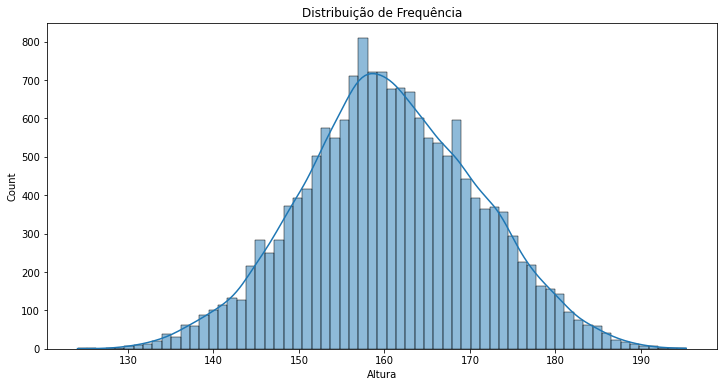

In [45]:
import seaborn as sns
#plotando o histograma da altura
ax = sns.histplot(data = dados, x = 'VB17004', kde=True)
#definindo o tamanho do plot
ax.figure.set_size_inches(12,6)
#setando título e label x
ax.set_title('Distribuição de Frequência')
ax.set_xlabel('Altura')
ax;

Vendo o histograma da altura entre os estudantes do sexo masculino e feminino. (incluindo o hue)

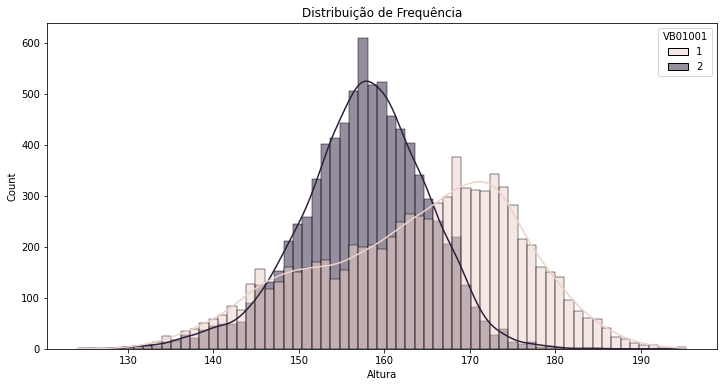

In [46]:
#plotando o histograma da altura
ax = sns.histplot(data = dados, x = 'VB17004', kde=True, hue='VB01001')
#definindo o tamanho do plot
ax.figure.set_size_inches(12,6)
#setando título e label x
ax.set_title('Distribuição de Frequência')
ax.set_xlabel('Altura')
ax;

Note que temos uma curva normal (simetrica) para as estudantes do sexo feminino enquanto os alunos do sexo masculino possuem uma assimetria a esquerda.

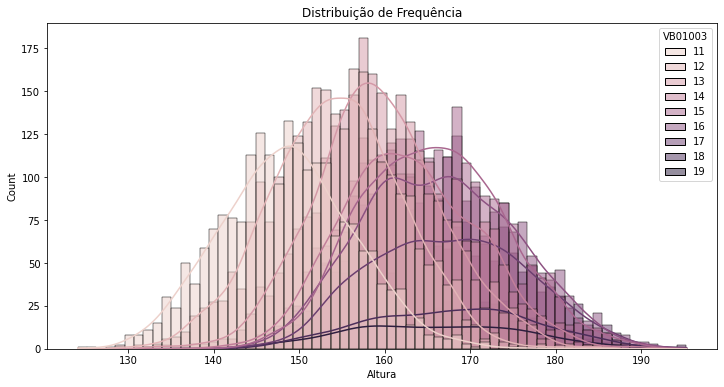

In [47]:
#plotando o histograma da altura
ax = sns.histplot(data = dados, x = 'VB17004', kde=True, hue='VB01003')
#definindo o tamanho do plot
ax.figure.set_size_inches(12,6)
#setando título e label x
ax.set_title('Distribuição de Frequência')
ax.set_xlabel('Altura')
ax;

O histograma pode trazer boas informações, no entanto, ele possui certas limitações, como quando, por exemplo, precisamos analisar diversas variáveis, como a idade.

###Desafio 7: Calcular o desvio padrão, média, moda e mediana e plotar no gráfico.

Primeiro vamos identificar o intervalo de plot do desvio padrão.

In [63]:
#Calculando o devio padrão acima e abaixo da média.
desvio_acima = dados['VB17004'].mean() + dados['VB17004'].std()
desvio_abaixo = dados['VB17004'].mean() - dados['VB17004'].std()

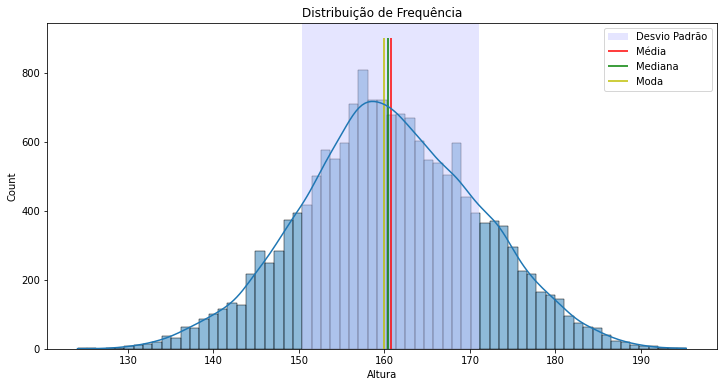

In [95]:
import matplotlib.pyplot as plt
#plotando o histograma da altura
ax = sns.histplot(data = dados, x = 'VB17004', kde=True)
#definindo o tamanho do plot
ax.figure.set_size_inches(12,6)
#setando título e label x
ax.set_title('Distribuição de Frequência')
ax.set_xlabel('Altura')
ax.vlines(dados['VB17004'].mean(), ymin=0, ymax=900, color='r', label='Média')
ax.vlines(dados['VB17004'].median(), ymin=0, ymax=900, color='g',label='Mediana')
ax.vlines(dados['VB17004'].mode(), ymin=0, ymax=900, color='y', label='Moda')
ax.axvspan(desvio_abaixo, desvio_acima, facecolor=(0.8,0.8,1), alpha=0.5, label="Desvio Padrão")
plt.legend()
ax;

###Desafio 8: Fazer a análise com o histograma para outras informações da base de dados.

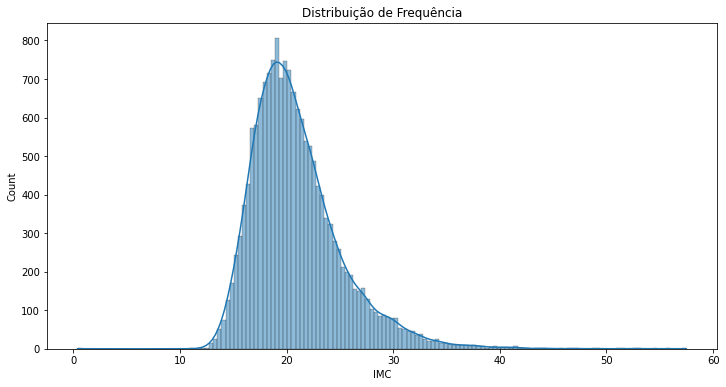

In [49]:
import matplotlib.pyplot as plt
#plotando o histograma da altura
ax = sns.histplot(data = dados, x = 'IMC', kde=True)
#definindo o tamanho do plot
ax.figure.set_size_inches(12,6)
#setando título e label x
ax.set_title('Distribuição de Frequência')
ax.set_xlabel('IMC')
ax;

##Boxplot e separatrizes

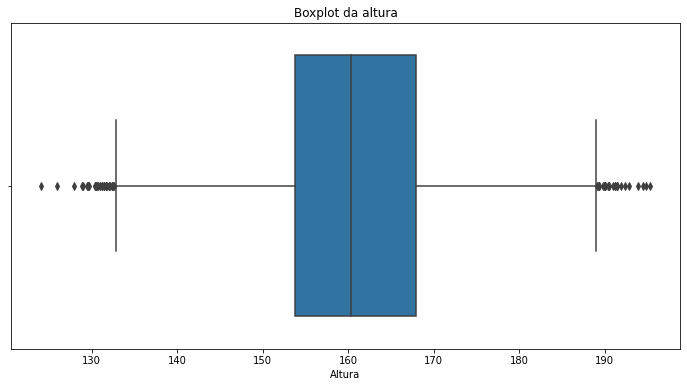

In [50]:
ax = sns.boxplot(data = dados, x='VB17004')
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot da altura')
ax.set_xlabel('Altura')
ax;

O boxplot mostra diversas medidas estatísticas, os quartis (separatrizes):
- O traço maior ao centro da caixa azul é a mediana.
- A primeira linha da caixa do lado esquerdo é o primeiro quartil (separa os primeiros 25% do restante)
- A segunda linha da caixa do lado direito é o terceiro quartil (separa os 75% do restante)
- A linha no extremo esquerdo são valores mínimos.
- A linha na extrema direita são valores máximos.
Os pontos além das extremidades representam outliers.

In [51]:
print('Primeiro quartil -', dados['VB17004'].quantile(0.25))
print('Mediana -', dados['VB17004'].quantile(0.50))
print('Terceiro quartil -', dados['VB17004'].quantile(0.75))

Primeiro quartil - 153.8
Mediana - 160.4
Terceiro quartil - 167.9


##Desafio 9: Pesquisar como é determinado os valores de outliers no boxplot do seaborn

In [52]:
primeiro_quartil = dados['VB17004'].quantile(0.25)
terceiro_quartil = dados['VB17004'].quantile(0.75)
limite_inferior = primeiro_quartil - 1.5 *(terceiro_quartil - primeiro_quartil)
limite_superior = terceiro_quartil + 1.5 *(terceiro_quartil - primeiro_quartil)
print(limite_inferior)
print(limite_superior)

132.65000000000003
189.05


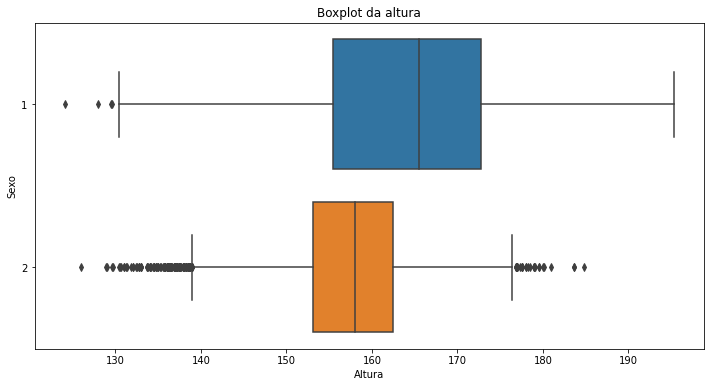

In [53]:
ax = sns.boxplot(data = dados, x='VB17004', y='VB01001', orient='h')
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot da altura')
ax.set_xlabel('Altura')
ax.set_ylabel('Sexo')
ax;

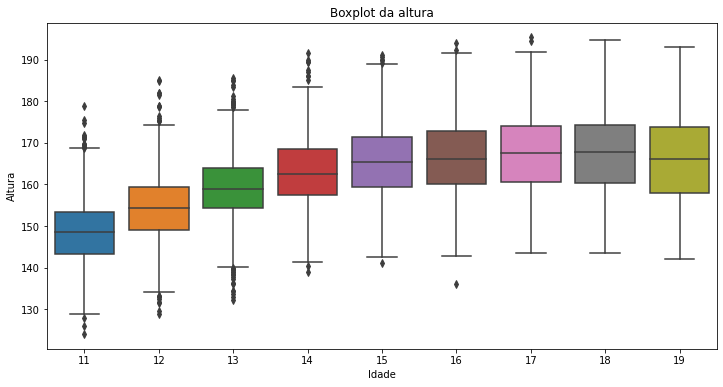

In [54]:
#Vizualizando a altura por idade.
ax = sns.boxplot(data = dados, x='VB01003', y='VB17004')
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot da altura')
ax.set_xlabel('Idade')
ax.set_ylabel('Altura')
ax;

Agora, ao contrário do histograma, conseguimos analizar a altura pela idade dos escolares, facilitando e muito a análise. Percebemos que existe uma tendência de subida no crescimento até aos 16 anos e então entra em um platô.

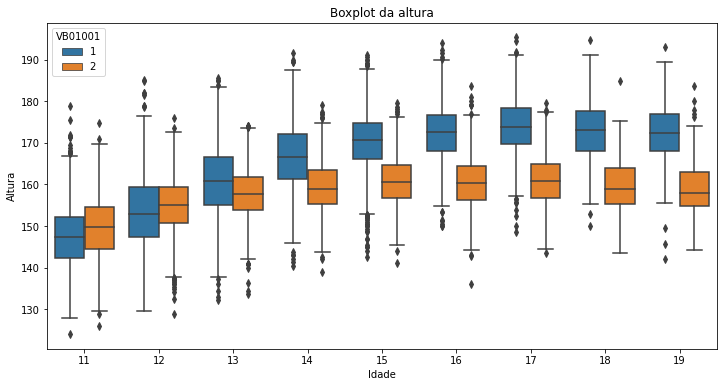

In [55]:
#Vizualizando a altura por idade e sexo.
ax = sns.boxplot(data = dados, x='VB01003', y='VB17004', hue='VB01001')
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot da altura')
ax.set_xlabel('Idade')
ax.set_ylabel('Altura')
ax;

Aparentemente após os 15 anos a diferença da altura entre pessoas do sexo masculino e feminino aumenta. Percebemos também que a aceleração de crescimento dos alunos do sexo masculino é bem mais acentuada do que a das alunas.

##Histograma acumulado

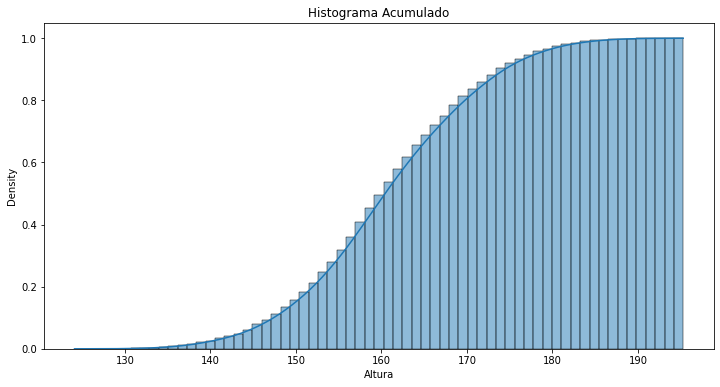

In [56]:
ax = sns.histplot(data = dados, x = 'VB17004', kde=True, cumulative=True, stat='density')
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma Acumulado')
ax.set_xlabel('Altura')
ax;

Nesse histograma conseguimos analisar que 20% da população tem 1.52 aproximadamente de altura, já 80% possui aproximadamente 1.70.

In [57]:
dados['VB17004'].quantile(0.8)

169.7

In [58]:
dados['VB17004'].quantile(0.2)

152.0

#Aula 5 - Medida de centralidade e dispersão